## Importing Libraries

In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots that will be created

The below are settings for displaying the results of a dataFrame. 

In [179]:
pd.set_option('display.max_rows', None) #this displays ALL data instead of just top and bottom 20
# pd.set_option('display.max_rows', 20) #this displays 20 data

## Reading In the Data

In [133]:
df = pd.read_csv(r'C:\Users\Donell\OneDrive\Documents\BENIA\CODE\Python Learn\Movies Correlation Project (Python)\movies.csv') 

In [134]:
df.head() # checks teh first 5 entries/rows

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Data Cleaning

### Dealing With Missing Data

In [135]:
for col in df.columns: # this will loop through all the column TITLES, therefore, the first col will be 'name'
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


### Convert Data Types for the Columns

In [136]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [137]:
# spliting the release column into 'Released Date' and 'Release Country'

df[['released date', 'realease country']] = df['released'].str.split("(", expand=True)




# deleting unwanted characters from realease country and released date column

df['realease country'] = df['realease country'].str.replace(')','')

C:\Users\Donell\AppData\Local\Temp/ipykernel_4788/346168012.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['realease country'] = df['realease country'].str.replace(')','')


In [138]:
#converting string date to datetime format

from dateutil.parser import parse

for i in range(len(df['released date'])):
    if isinstance(df['released date'][i],str):
        df['released date'][i] = parse(df['released date'][i])

C:\Users\Donell\AppData\Local\Temp/ipykernel_4788/1320840601.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['released date'][i] = parse(df['released date'][i])


In [139]:
# this is an EDA on the script above

count = 0;
nan_date = [];
for i in range(len(df['released date'])):
    if not isinstance(df['released date'][i], datetime.datetime):
        count = count + 1
        nan_date.append(df['released date'][i])
print('There are {} none datetime entries out of {} total entries'.format(count,len(df['released date'])))
print('And these entries are {}'.format(nan_date))

There are 2 none datetime entries out of 7668 total entries
And these entries are [nan, nan]


In [140]:
# replace NaN values in rating with 'Not Rated'

for i in range(len(df['rating'])):
    if df['rating'][i] == 'Unrated':
        df['rating'][i] = 'Not Rated'   # changes unrated to Not Rated
        
df['rating'].fillna('Not Rated', inplace = True) #fills NaN with 'Not Rated'

C:\Users\Donell\AppData\Local\Temp/ipykernel_4788/4132877435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'][i] = 'Not Rated'   # changes unrated to Not Rated


In [141]:
# delete every row which has a NaN value within it

df.dropna(inplace = True)

In [142]:
# rechecking for NaN values
for col in df.columns: # this will loop through all the column TITLES, therefore, the first col will be 'name'
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
released date - 0.0%
realease country - 0.0%


In [143]:
# the YEAR coulun and the year on the release date must match, therefore, we will spit the release date column and create a 
# ... seperate column

if isinstance(df['released date'], object):
    df['year of Release'] = pd.DatetimeIndex(df['released date']).year.astype('int64') # changes values to int64

In [144]:
# drop released column as it has been split into the date and country column

del df['released']

In [145]:
# make gross, budget, score, votes, runtime, year of release column int types

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['score'] = df['score'].astype('float64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('float64')
df['year of Release'] = df['year of Release'].astype('int64')

## Exploratory Data Analysis

In [146]:
# view the data sorted by the budget, gross from highest to low, votes, year of release 

df.sort_values(by = ['budget'], inplace = False, ascending=False)
# df.sort_values(by = ['gross'], inplace = False, ascending=False)
# df.sort_values(by = ['votes'], inplace = False, ascending=False).head(20)
# df.sort_values(by = ['year of Release'], inplace = False, ascending=True).head(30)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released date,realease country,year of Release
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26 00:00:00,United States,2019
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27 00:00:00,United States,2018
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0,2017-12-15 00:00:00,United States,2017
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0,2007-05-25 00:00:00,United States,2007
7066,Justice League,PG-13,Action,2017,6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0,2017-11-17 00:00:00,United States,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,The Living End,Not Rated,Comedy,1992,6.5,2900,Gregg Araki,Gregg Araki,Mike Dytri,United States,22769,692585,Desperate Pictures,81.0,1992-08-21 00:00:00,United States,1992
5114,Paranormal Activity,R,Horror,2007,6.3,225000,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86.0,2009-10-16 00:00:00,United States,2009
2093,El Mariachi,R,Action,1992,6.9,64000,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81.0,1993-02-26 00:00:00,United States,1993
4507,Primer,PG-13,Drama,2004,6.9,101000,Shane Carruth,Shane Carruth,Shane Carruth,United States,7000,545436,ERBP,77.0,2005-05-27 00:00:00,Spain,2005


In [147]:
# finding the unique values for Rating, GENRE, Country, Company

print(df['rating'].unique())

print(df['genre'].unique())

print(df['country'].unique())

print(df['company'].unique())

['R' 'PG' 'G' 'NC-17' 'Approved' 'Not Rated' 'PG-13' 'X' 'TV-MA']
['Drama' 'Adventure' 'Action' 'Comedy' 'Horror' 'Biography' 'Crime'
 'Fantasy' 'Animation' 'Family' 'Western' 'Sci-Fi' 'Romance' 'Thriller'
 'Mystery']
['United Kingdom' 'United States' 'South Africa' 'West Germany' 'Canada'
 'Australia' 'Italy' 'South Korea' 'Sweden' 'Spain' 'Hong Kong' 'Mexico'
 'Switzerland' 'France' 'New Zealand' 'Japan' 'Yugoslavia' 'Ireland'
 'Germany' 'Austria' 'Portugal' 'China' 'Taiwan' 'Republic of Macedonia'
 'Russia' 'Federal Republic of Yugoslavia' 'Iran' 'Czech Republic'
 'Denmark' 'Jamaica' 'Brazil' 'Aruba' 'Argentina' 'India' 'Netherlands'
 'Colombia' 'Norway' 'Israel' 'Belgium' 'United Arab Emirates' 'Indonesia'
 'Hungary' 'Kenya' 'Iceland' 'Chile' 'Finland' 'Panama' 'Malta' 'Lebanon'
 'Thailand']
['Warner Bros.' 'Columbia Pictures' 'Lucasfilm' ...
 'Clubhouse Pictures (II)' '20th Century Studios'
 'Beijing Diqi Yinxiang Entertainment']


In [148]:
# finding genres, rating, country, company count

print("These are the genres:\n\n{} ".format(df['genre'].value_counts()))
print("These are the ratings:\n\n{} ".format(df['rating'].value_counts()))
print("These are the countries:\n\n{} ".format(df['country'].value_counts()))
print("These are the companies:\n\n{} ".format(df['company'].value_counts().head(30)))

These are the genres:

Comedy       1496
Action       1416
Drama         868
Crime         400
Adventure     327
Biography     311
Animation     278
Horror        253
Fantasy        42
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64 
These are the ratings:

R            2597
PG-13        1729
PG            907
G             111
Not Rated      72
NC-17          12
TV-MA           2
Approved        1
X               1
Name: rating, dtype: int64 
These are the countries:

United States            4323
United Kingdom            494
Canada                    111
France                    105
Germany                    82
                         ... 
Jamaica                     1
Republic of Macedonia       1
Portugal                    1
Yugoslavia                  1
Thailand                    1
Name: country, Length: 50, dtype: int64 
These are the companies:

Universal Pictures       330
Columbia Pictu

In [149]:
# find the different movie names in Romance # not verynecessary, just a view of the movies

for i, row in df.iterrows():
    if df['genre'][i] == 'Romance':
        print(df['name'][i])

Starman
The House of Mirth
Love's Labour's Lost
Passengers
The Adjustment Bureau


In [150]:
# let data order by gross

df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [151]:
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released date,realease country,year of Release
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18 00:00:00,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26 00:00:00,United States,2019
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19 00:00:00,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18 00:00:00,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27 00:00:00,United States,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994-06-04 00:00:00,South Korea,1994
3681,Ginger Snaps,Not Rated,Drama,2000,6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001-05-11 00:00:00,Canada,2001
272,Parasite,R,Horror,1982,3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982-03-12 00:00:00,United States,1982
2417,Madadayo,Not Rated,Drama,1993,7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993-04-17 00:00:00,Japan,1993


In [152]:
# looking for movies that had a loss i.e. Budget > Gross

count = 0
while count < (len(df) - 1):
    if df.iloc[count, 10] > df.iloc[count, 11]:
        print("The movie '{}' had a loss of {} with a budget of {} and a gross of {}\n\n".format(df.iloc[count,0], 
                                                                                             df.iloc[count, 10] - df.iloc[count, 11],
                                                                                             df.iloc[count, 10],
                                                                                             df.iloc[count, 11]))
        count = count + 1
    else:
        count = count + 1

The movie 'Evan Almighty' had a loss of 559276 with a budget of 175000000 and a gross of 174440724


The movie '47 Ronin' had a loss of 23216161 with a budget of 175000000 and a gross of 151783839


The movie 'King Arthur: Legend of the Sword' had a loss of 26324934 with a budget of 175000000 and a gross of 148675066


The movie 'Pan' had a loss of 21611680 with a budget of 150000000 and a gross of 128388320


The movie 'Sahara' had a loss of 10759649 with a budget of 130000000 and a gross of 119240351


The movie 'The Call of the Wild' had a loss of 23894503 with a budget of 135000000 and a gross of 111105497


The movie 'Treasure Planet' had a loss of 29958637 with a budget of 140000000 and a gross of 110041363


The movie 'The Good Shepherd' had a loss of 9733135 with a budget of 110000000 and a gross of 100266865


The movie 'Fred Claus' had a loss of 2161651 with a budget of 100000000 and a gross of 97838349


The movie 'Ben-Hur' had a loss of 5938689 with a budget of 100000000 an


The movie 'Gremlins 2: The New Batch' had a loss of 8517793 with a budget of 50000000 and a gross of 41482207


The movie 'Leatherheads' had a loss of 16680961 with a budget of 58000000 and a gross of 41319039


The movie 'The Mirror Has Two Faces' had a loss of 916136 with a budget of 42000000 and a gross of 41083864


The movie 'Dredd' had a loss of 8962258 with a budget of 50000000 and a gross of 41037742


The movie 'Twisted' had a loss of 9045397 with a budget of 50000000 and a gross of 40954603


The movie 'Drive Angry' had a loss of 9090091 with a budget of 50000000 and a gross of 40909909


The movie 'The Love Guru' had a loss of 21122444 with a budget of 62000000 and a gross of 40877556


The movie 'Gamer' had a loss of 9171460 with a budget of 50000000 and a gross of 40828540


The movie 'Holmes & Watson' had a loss of 1533030 with a budget of 42000000 and a gross of 40466970


The movie 'Bless the Child' had a loss of 24556990 with a budget of 65000000 and a gross of 404430


The movie 'Angel Eyes' had a loss of 23284394 with a budget of 53000000 and a gross of 29715606


The movie 'City by the Sea' had a loss of 10323297 with a budget of 40000000 and a gross of 29676703


The movie 'Luther' had a loss of 367316 with a budget of 30000000 and a gross of 29632684


The movie 'Across the Universe' had a loss of 15374239 with a budget of 45000000 and a gross of 29625761


The movie 'Cursed' had a loss of 8378278 with a budget of 38000000 and a gross of 29621722


The movie 'The Pledge' had a loss of 5580709 with a budget of 35000000 and a gross of 29419291


The movie 'Nurse Betty' had a loss of 5635011 with a budget of 35000000 and a gross of 29364989


The movie 'The Frighteners' had a loss of 640784 with a budget of 30000000 and a gross of 29359216


The movie 'Hoffa' had a loss of 5697879 with a budget of 35000000 and a gross of 29302121


The movie 'Bulworth' had a loss of 797116 with a budget of 30000000 and a gross of 29202884


The movie 'The Young Vic


The movie 'Domino' had a loss of 27015372 with a budget of 50000000 and a gross of 22984628


The movie 'The Human Stain' had a loss of 7045932 with a budget of 30000000 and a gross of 22954068


The movie 'Beloved' had a loss of 57147513 with a budget of 80000000 and a gross of 22852487


The movie 'Dr. T & the Women' had a loss of 155709 with a budget of 23000000 and a gross of 22844291


The movie 'Frankie and Johnny' had a loss of 6226465 with a budget of 29000000 and a gross of 22773535


The movie 'The Juror' had a loss of 21245275 with a budget of 44000000 and a gross of 22754725


The movie 'Live by Night' had a loss of 85321445 with a budget of 108000000 and a gross of 22678555


The movie 'The Borrowers' had a loss of 6380411 with a budget of 29000000 and a gross of 22619589


The movie 'Bulletproof' had a loss of 2388046 with a budget of 25000000 and a gross of 22611954


The movie 'EuroTrip' had a loss of 2394847 with a budget of 25000000 and a gross of 22605153


The movi


The movie 'All the Pretty Horses' had a loss of 38866505 with a budget of 57000000 and a gross of 18133495


The movie 'Dead Man Down' had a loss of 11925461 with a budget of 30000000 and a gross of 18074539


The movie 'Deception' had a loss of 6975455 with a budget of 25000000 and a gross of 18024545


The movie 'The Country Bears' had a loss of 16987903 with a budget of 35000000 and a gross of 18012097


The movie 'Whiteout' had a loss of 17023333 with a budget of 35000000 and a gross of 17976667


The movie 'City of Ember' had a loss of 37070316 with a budget of 55000000 and a gross of 17929684


The movie 'Flyboys' had a loss of 42141941 with a budget of 60000000 and a gross of 17858059


The movie 'The Rage: Carrie 2' had a loss of 3237295 with a budget of 21000000 and a gross of 17762705


The movie 'Before I Go to Sleep' had a loss of 4330224 with a budget of 22000000 and a gross of 17669776


The movie 'Frantic' had a loss of 2362050 with a budget of 20000000 and a gross of 1


The movie 'The Legend of the Lone Ranger' had a loss of 5382155 with a budget of 18000000 and a gross of 12617845


The movie 'Gossip' had a loss of 11408730 with a budget of 24000000 and a gross of 12591270


The movie 'People Like Us' had a loss of 3441069 with a budget of 16000000 and a gross of 12558931


The movie 'Gattaca' had a loss of 23467223 with a budget of 36000000 and a gross of 12532777


The movie 'Judgment Night' had a loss of 8473323 with a budget of 21000000 and a gross of 12526677


The movie 'Zoom' had a loss of 22493638 with a budget of 35000000 and a gross of 12506362


The movie 'The Marrying Man' had a loss of 13545232 with a budget of 26000000 and a gross of 12454768


The movie 'Ready to Rumble' had a loss of 11547638 with a budget of 24000000 and a gross of 12452362


The movie 'Mary Reilly' had a loss of 34620598 with a budget of 47000000 and a gross of 12379402


The movie 'Say It Isn't So' had a loss of 12679607 with a budget of 25000000 and a gross of 12


The movie 'The Dark Half' had a loss of 4388840 with a budget of 15000000 and a gross of 10611160


The movie 'Bad Lieutenant: Port of Call New Orleans' had a loss of 14393578 with a budget of 25000000 and a gross of 10606422


The movie 'First Daughter' had a loss of 19407820 with a budget of 30000000 and a gross of 10592180


The movie 'LOL' had a loss of 421357 with a budget of 11000000 and a gross of 10578643


The movie 'Drop Dead Gorgeous' had a loss of 4428592 with a budget of 15000000 and a gross of 10571408


The movie 'Three to Tango' had a loss of 9429625 with a budget of 20000000 and a gross of 10570375


The movie 'Husbands and Wives' had a loss of 9444381 with a budget of 20000000 and a gross of 10555619


The movie 'We're No Angels' had a loss of 9444652 with a budget of 20000000 and a gross of 10555348


The movie 'Home Fries' had a loss of 24506634 with a budget of 35000000 and a gross of 10493366


The movie 'The Newton Boys' had a loss of 16547988 with a budget of 2

The movie 'Centurion' had a loss of 5109568 with a budget of 12000000 and a gross of 6890432


The movie 'Veer-Zaara' had a loss of 112779 with a budget of 7000000 and a gross of 6887221


The movie 'Exit to Eden' had a loss of 18158430 with a budget of 25000000 and a gross of 6841570


The movie 'The Pope of Greenwich Village' had a loss of 1163799 with a budget of 8000000 and a gross of 6836201


The movie 'Mixed Nuts' had a loss of 8178150 with a budget of 15000000 and a gross of 6821850


The movie 'The Big Bounce' had a loss of 43191450 with a budget of 50000000 and a gross of 6808550


The movie 'What Just Happened' had a loss of 18240943 with a budget of 25000000 and a gross of 6759057


The movie 'The Sun Is also a Star' had a loss of 2249971 with a budget of 9000000 and a gross of 6750029


The movie 'The Mambo Kings' had a loss of 8757832 with a budget of 15500000 and a gross of 6742168


The movie 'Midnight Special' had a loss of 11259353 with a budget of 18000000 and a gros


The movie '90 Minutes in Heaven' had a loss of 157301 with a budget of 5000000 and a gross of 4842699


The movie 'Diggstown' had a loss of 12163363 with a budget of 17000000 and a gross of 4836637


The movie 'Hamlet' had a loss of 13229778 with a budget of 18000000 and a gross of 4770222


The movie 'The Good Mother' had a loss of 9235394 with a budget of 14000000 and a gross of 4764606


The movie 'Stealing Beauty' had a loss of 5237690 with a budget of 10000000 and a gross of 4762310


The movie 'The Other Side of Heaven' had a loss of 2239986 with a budget of 7000000 and a gross of 4760014


The movie 'A Walk on the Moon' had a loss of 9249340 with a budget of 14000000 and a gross of 4750660


The movie 'Violets Are Blue...' had a loss of 5256713 with a budget of 10000000 and a gross of 4743287


The movie 'Your Friends and Neighbors' had a loss of 285342 with a budget of 5000000 and a gross of 4714658


The movie 'King Kong Lives' had a loss of 5288780 with a budget of 10000000 


The movie 'By the Sea' had a loss of 6665073 with a budget of 10000000 and a gross of 3334927


The movie 'The Death & Life of John F. Donovan' had a loss of 31673636 with a budget of 35000000 and a gross of 3326364


The movie 'The Limey' had a loss of 6674264 with a budget of 10000000 and a gross of 3325736


The movie 'Carpool' had a loss of 13674349 with a budget of 17000000 and a gross of 3325651


The movie 'Pootie Tang' had a loss of 3686417 with a budget of 7000000 and a gross of 3313583


The movie 'Gun Shy' had a loss of 10715556 with a budget of 14000000 and a gross of 3284444


The movie 'Only the Strong' had a loss of 2716629 with a budget of 6000000 and a gross of 3283371


The movie 'Good Time' had a loss of 1216631 with a budget of 4500000 and a gross of 3283369


The movie 'Romeo Is Bleeding' had a loss of 8224415 with a budget of 11500000 and a gross of 3275585


The movie 'Pathology' had a loss of 4765294 with a budget of 8000000 and a gross of 3234706


The movie '


The movie 'Son of the Pink Panther' had a loss of 22561969 with a budget of 25000000 and a gross of 2438031


The movie 'Cake' had a loss of 4566150 with a budget of 7000000 and a gross of 2433850


The movie 'Joe' had a loss of 1568557 with a budget of 4000000 and a gross of 2431443


The movie 'After.Life' had a loss of 2074465 with a budget of 4500000 and a gross of 2425535


The movie 'Farewell to the King' had a loss of 17579083 with a budget of 20000000 and a gross of 2420917


The movie 'If Lucy Fell' had a loss of 2579838 with a budget of 5000000 and a gross of 2420162


The movie 'Lawnmower Man 2: Beyond Cyberspace' had a loss of 12590775 with a budget of 15000000 and a gross of 2409225


The movie 'Fish Tank' had a loss of 595700 with a budget of 3000000 and a gross of 2404300


The movie 'Kalifornia' had a loss of 6604769 with a budget of 9000000 and a gross of 2395231


The movie 'Laggies' had a loss of 2620846 with a budget of 5000000 and a gross of 2379154


The movie 'S


The movie 'The Waterdance' had a loss of 976681 with a budget of 2700000 and a gross of 1723319


The movie 'Steel' had a loss of 14289028 with a budget of 16000000 and a gross of 1710972


The movie 'Even Cowgirls Get the Blues' had a loss of 6291127 with a budget of 8000000 and a gross of 1708873


The movie 'Men, Women & Children' had a loss of 14294092 with a budget of 16000000 and a gross of 1705908


The movie 'Lady in White' had a loss of 2994861 with a budget of 4700000 and a gross of 1705139


The movie 'Death Wish: The Face of Death' had a loss of 3297606 with a budget of 5000000 and a gross of 1702394


The movie 'Best of the Best' had a loss of 3300000 with a budget of 5000000 and a gross of 1700000


The movie 'Matewan' had a loss of 2319642 with a budget of 4000000 and a gross of 1680358


The movie 'A Home of Our Own' had a loss of 10322193 with a budget of 12000000 and a gross of 1677807


The movie 'The Gingerbread Man' had a loss of 23322869 with a budget of 25000000


The movie 'Mother's Boys' had a loss of 7262452 with a budget of 8000000 and a gross of 737548


The movie 'Lust in the Dust' had a loss of 2272361 with a budget of 3000000 and a gross of 727639


The movie 'Vampire's Kiss' had a loss of 1274869 with a budget of 2000000 and a gross of 725131


The movie 'The Wicked Lady' had a loss of 7275088 with a budget of 8000000 and a gross of 724912


The movie 'Feast' had a loss of 2480865 with a budget of 3200000 and a gross of 719135


The movie 'Passion' had a loss of 19286384 with a budget of 20000000 and a gross of 713616


The movie 'Strangeland' had a loss of 386761 with a budget of 1100000 and a gross of 713239


The movie 'Mr. Church' had a loss of 7314220 with a budget of 8000000 and a gross of 685780


The movie 'Spun' had a loss of 1314392 with a budget of 2000000 and a gross of 685608


The movie 'All I See Is You' had a loss of 29321850 with a budget of 30000000 and a gross of 678150


The movie 'Manderlay' had a loss of 13525082 


The movie 'Repo Man' had a loss of 1371000 with a budget of 1500000 and a gross of 129000


The movie 'Twin Town' had a loss of 3172077 with a budget of 3300000 and a gross of 127923


The movie 'Police Academy: Mission to Moscow' had a loss of 6073753 with a budget of 6200000 and a gross of 126247


The movie 'The Night Flier' had a loss of 874603 with a budget of 1000000 and a gross of 125397


The movie 'The Beyond' had a loss of 276157 with a budget of 400000 and a gross of 123843


The movie 'There Goes My Baby' had a loss of 10376491 with a budget of 10500000 and a gross of 123509


The movie 'Gentlemen Broncos' had a loss of 9881508 with a budget of 10000000 and a gross of 118492


The movie 'The Big Picture' had a loss of 4882537 with a budget of 5000000 and a gross of 117463


The movie 'Gummo' had a loss of 1183201 with a budget of 1300000 and a gross of 116799


The movie 'Shakes the Clown' had a loss of 1284897 with a budget of 1400000 and a gross of 115103


The movie 'Gu

## Correlation 

### Hypothesis:

- There is a correlation between Budget, Score, Company, Votes, Director, Writer, Star, Country, Genre with GROSS

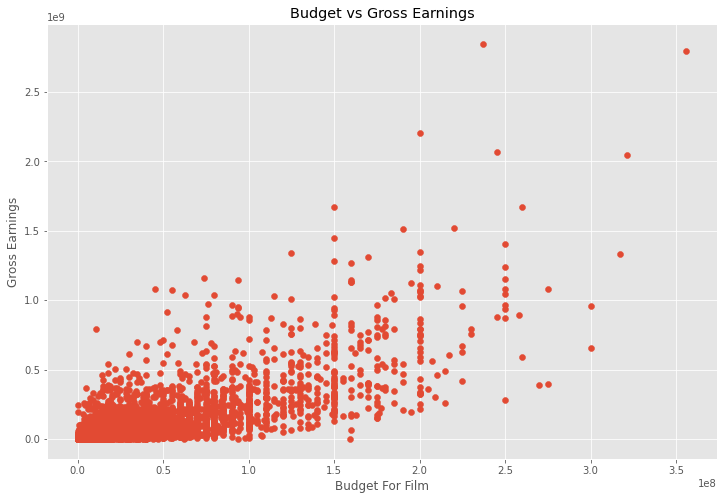

In [153]:
# Scatter PLot with Budget vs Gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

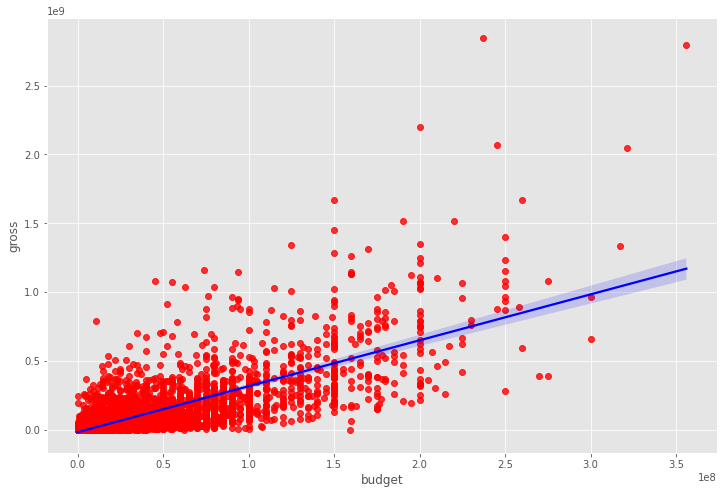

In [154]:
# plot the budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws ={"color":"red"}, line_kws = {"color":"blue"})

In [155]:
df.corr(method = 'pearson') # this is the pearson METHOD of correlation [Default Method]. There are two other methods namely:
          #    - Kendall Method
          #    - Spearman Method

,year,score,votes,budget,gross,runtime,year of Release
year,1.000000,0.055223,0.205862,0.327888,0.274434,0.074666,0.998639
score,0.055223,1.000000,0.473687,0.071568,0.221950,0.414463,0.061075
votes,0.205862,0.473687,1.000000,0.439890,0.614824,0.352322,0.202979
budget,0.327888,0.071568,0.439890,1.000000,0.740362,0.318423,0.320339
gross,0.274434,0.221950,0.614824,0.740362,1.000000,0.275470,0.268785
runtime,0.074666,0.414463,0.352322,0.318423,0.275470,1.000000,0.074889
year of Release,0.998639,0.061075,0.202979,0.320339,0.268785,0.074889,1.000000


- from above, we see a high correlation between budget, votes with the gross

Text(87.0, 0.5, 'Movie Features')

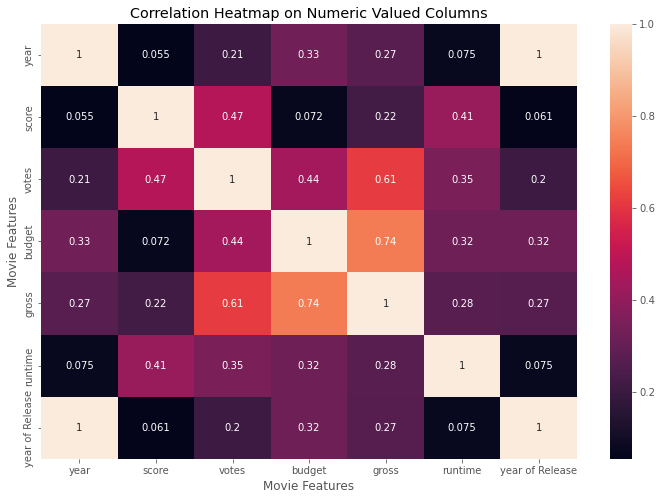

In [156]:
corr_matrix = df.corr(method = 'pearson')

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap on Numeric Valued Columns')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

- the above shows correlations using the Seaborn Heatmap

In [159]:
# For Other None Numeric Column Correlations, we shall assign the unique values of the columns numeric, unique values

df_num = df.copy()

for col_names in df_num.columns:
    if df_num[col_names].dtypes == 'object':
        df_num[col_names] = df_num[col_names].astype('category')
        df_num[col_names] = df_num[col_names].cat.codes

df_num

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released date,realease country,year of Release
5445,387,5,0,2009,7.8,1100000,787,1264,1537,47,237000000,2847246203,1387,162.0,1707,47,2009
7445,389,5,0,2019,8.4,903000,106,514,1473,47,356000000,2797501328,986,181.0,2341,47,2019
3045,4919,5,6,1997,7.8,1100000,787,1264,1075,47,200000000,2201647264,1387,194.0,938,47,1997
6663,3653,5,0,2015,7.8,876000,770,1809,356,47,245000000,2069521700,948,138.0,2131,47,2015
7244,390,5,0,2018,8.4,897000,106,514,1473,47,321000000,2048359754,986,149.0,2274,47,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2978,5,0,1993,4.5,1900,1807,3109,186,47,5000000,2970,1381,97.0,722,39,1994
3681,1598,3,6,2000,6.8,43000,954,1686,527,6,5000000,2554,468,108.0,1152,8,2001
272,2918,6,9,1982,3.9,2300,263,55,1476,47,800000,2270,584,85.0,64,47,1982
2417,2399,3,6,1993,7.3,5100,23,1219,1686,26,11900000,596,492,134.0,646,25,1993


Text(87.0, 0.5, 'Movie Features')

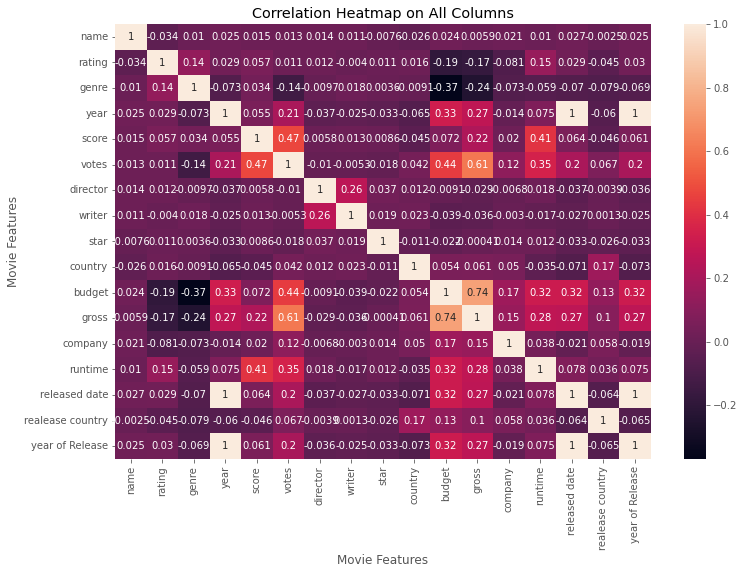

In [165]:
# this will show ALL corelations between the numeric dataframe of the movie features using the pearson METHOD.

corr_matrix1 = df_num.corr(method = 'pearson')

sns.heatmap(corr_matrix1, annot=True)
plt.title('Correlation Heatmap on All Columns')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [174]:
# want to view the correlation of each Feature with other features easily or differently

corr_matrix1 = df_num.corr(method = 'pearson')

corr_pairs = corr_matrix1.unstack()

corr_pairs

name             name                1.000000
                 rating             -0.034206
                 genre               0.010247
                 year                0.024901
                 score               0.014785
                                       ...   
year of Release  company            -0.018843
                 runtime             0.074889
                 released date       0.998558
                 realease country   -0.065107
                 year of Release     1.000000
Length: 289, dtype: float64

In [181]:
# diffrent view with the highest correlation to the least

sorted_pairs = corr_pairs.sort_values(ascending = False)
sorted_pairs

name              name                1.000000
rating            rating              1.000000
realease country  realease country    1.000000
released date     released date       1.000000
runtime           runtime             1.000000
company           company             1.000000
gross             gross               1.000000
budget            budget              1.000000
country           country             1.000000
writer            writer              1.000000
director          director            1.000000
votes             votes               1.000000
score             score               1.000000
year              year                1.000000
genre             genre               1.000000
star              star                1.000000
year of Release   year of Release     1.000000
                  year                0.998639
year              year of Release     0.998639
year of Release   released date       0.998558
released date     year of Release     0.998558
year         

In [187]:
# this is the list of all highly correlated features

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

name              name                1.000000
rating            rating              1.000000
realease country  realease country    1.000000
released date     released date       1.000000
runtime           runtime             1.000000
company           company             1.000000
gross             gross               1.000000
budget            budget              1.000000
country           country             1.000000
writer            writer              1.000000
director          director            1.000000
votes             votes               1.000000
score             score               1.000000
year              year                1.000000
genre             genre               1.000000
star              star                1.000000
year of Release   year of Release     1.000000
                  year                0.998639
year              year of Release     0.998639
year of Release   released date       0.998558
released date     year of Release     0.998558
year         